<a href="https://colab.research.google.com/github/zachfreitas/ADS_504_Machine_Learning/blob/main/Module_2/assignment_2/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2.1
Zachariah Freitas



## Question 2

### 2.1

In [32]:
# Import Libraries
%matplotlib inline
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [8]:
# Get data
s_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/shelter_data.csv')

# Resaving as a generic name for reusable code.
df = s_df

s_df.head(5)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [13]:
s_df.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [26]:
# Get Features and corresponding outcomes
feature_names = ['AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']

# List down features based on type



training_features = df[feature_names]
outcome_name = ['OutcomeType']
outcome_labels = df[outcome_name]

# Re-engineer Categorical Features

# Create dummy variables from categorical features.
categorical_feature_names = ['AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']
training_features = pd.get_dummies(training_features, columns = categorical_feature_names)


# # Re-engineer Numerical Features
# numeric_feature_names = [ 'example', 'example']
# from sklearn.preprocessing  import StandardScaler
# ss = StandardScaler()
# # fit scaler on numeric features
# ss.fit(training_features[numeric_feature_names])
# # scale numeric fearures now
# training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])



# View newly engineered features.
training_features.head(5)


,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,AgeuponOutcome_0 years,AgeuponOutcome_1 day,AgeuponOutcome_1 month,...,Color_White/Yellow,Color_White/Yellow Brindle,Color_Yellow,Color_Yellow Brindle,Color_Yellow Brindle/Blue,Color_Yellow Brindle/Tan,Color_Yellow Brindle/White,Color_Yellow/Black,Color_Yellow/White,Color_Yellow/Yellow
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Create a test train split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(training_features,outcome_labels,test_size=0.2)

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(x_train, y_train)
y_pred = tree.predict(x_test)

In [41]:
# Classification Performance Metrics
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

                 precision    recall  f1-score   support

       Adoption       0.78      0.65      0.71      2612
           Died       0.07      0.20      0.11        15
     Euthanasia       0.16      0.22      0.19       222
Return_to_owner       0.38      0.42      0.40       858
       Transfer       0.61      0.70      0.65      1639

       accuracy                           0.61      5346
      macro avg       0.40      0.44      0.41      5346
   weighted avg       0.64      0.61      0.62      5346



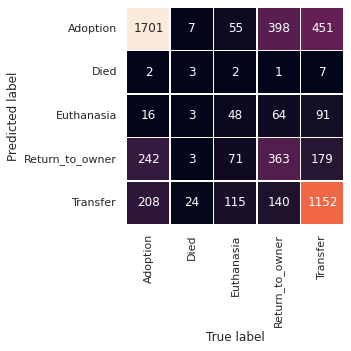

In [77]:
# Visualize the confusion matirx.
from sklearn.metrics import confusion_matrix
labels=tree.classes_ # Get the unique labels in the model.
mat = confusion_matrix(y_test, y_pred, labels=labels)
cm_array_df = pd.DataFrame(mat, index=labels, columns=labels)
sns.heatmap(cm_array_df.T, square=True, annot=True, fmt='d', cbar=False, linewidths=.5)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [65]:
tree.classes_

array(['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'],
      dtype=object)

In [30]:
# simple evaluation on training data
pred_labels = tree.predict(x_train)
actual_labels = np.array(outcome_labels['Recommend'])

# evaluate model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy:', float(accuracy_score(actual_labels, pred_labels))*100, '%')
print('Classification Stats:')
print(classification_report(actual_labels, pred_labels))

KeyError: ignored

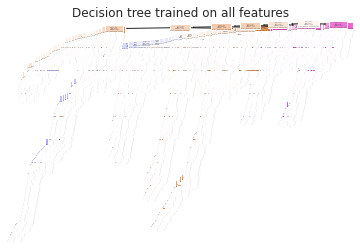

In [38]:
# Visualize the tree.
from sklearn.tree import plot_tree

plt.figure()
plot_tree(tree, filled=True, max_depth=None)
plt.title("Decision tree trained on all features")
plt.show()

### 2.2


In [ ]:
# Get data
t_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/text_data.csv')
t_df




### 2.3

In [ ]:
# Get data
a_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/audio_data.csv')
a_df




## Question 3
### 3.1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

### 3.2

### 3.3

### 3.5

